In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from motion.gca import GCA
from conics.orbitals import Orbitals 
from query.orbitals import MajorBodyQuery

1. Demuestre que el movimiento de un planeta sobre una órbita elíptica con semieje mayor $a$ y excentricidad $e$ (con $e\ll 1$) es equivalente al que se produce al combinar el movimiento de un punto P sobre un círculo de radio $a$ centrado en el foco, y el del planeta sobre una elipse con semiejes mayor $2ae$ y menor $ae$ con centro en el punto P (ver Figura 2.8 en MD2.6), ambos movimientos con la misma frecuencia angular $n$ de la órbita original. A esta equivalencia se la llama *la aproximación del centro guía* (en lo sucesivo la abreviaremos como ACG)

In [2]:
gca = GCA()
gca.proof()

Dado el caso de un problema de dos cuerpos gravitacional, si uno de estos orbita al otro siguiendo una trayectoria aproximadamente circular $(e << 1)$, se puede estudiar su movimiento descomponiendolo en una parte circular y otra eliptica descritas por dos puntos especiales.

Un punto G en movimiento circular uniforme a una distancia (a) del centro, que corresponde con el semiejer mayor del cuerpo en su orbita, y una frecuencia angular media n resultado de la tercera ley de Kepler: $n = \sqrt{\frac{\mu}{a^3}}$

Ademas, se tiene un punto P orbitandolo con una trayectoria eliptica caracterizada por un semieje mayor y menor de longitud $2ae$ y $ae$ respectivamente, con (e) la excentricidad de la elipse. Este tambien orbita al punto G a la misma frecuencia angular media del mismo. El movimiento del cuerpo P, descrito desde un sistema de referencia centrado en G y a partir del diagrama en la figura 2.8 de MD, puede ser descrito en terminos de la anomalia verdadera y la anomlia media como: $x = r\cos{(f-M)} - a$ e $y = r\sin{(f-M)}$

Teniendo en cuenta la expasion del argumento de la funciones sinusoidales de cada coordenada, mostrado en la ecuacion 2.88 de MD, y el hecho de que por definicion de (e) cualquiera de sus potencias mayores a 1 tiende a cero, las expresiones para x e y se convierten a: $f - M \approx 2e\sin{M}$, $x \approx r\cos{(2e\sin{M})} - a$ e $y \approx r\sin{(2e\sin{M})}$

Estas expresiones pueden ser simplificadas realizando una nueva expansion en series de cosenos y senos para los terminos sinusoidales: $\cos{(2e\sin{M})} = 1 - 2e^{2}\sin{M}^2$ y $\sin{(2e\sin{M})} = 2e\sin{M}$

Ademas, de la ecuacion 2.20 se tiene que: $r = \frac{a(1-e^2)}{1 + e\cos{f}}$ el cual al expandir su denominador en torno a (e). Nuevamnete, siendo este un valor pequeño, se obtiene la expresion $(1-e\cos{f})$ en el denominador, mientras que en el numerador la potencia cuadratica desaparece por la misma razon, finalizando con la expresion: $r = \frac{a(1-e^2)}{1 + e\cos{f}} \approx a(1-e^2)\cdot(1-e\cos{f}) \approx a(1-e\cos{f})$

Y usando nuevamente el resultado de la ecuacion 2.88: $ f - M \approx 2e\sin{M}$ , se obtiene entonces que: $\cos{f} \approx \cos{M + 2e\sin{M}}$

Donde, dada la magnitud de e, el lado derecho adquiere la forma $\cos{M + \delta} \approx \cos{M} - \delta\sin{M}$, por lo cual: $\cos{f} \approx \cos{M} - \delta\sin{M} = \cos{M} - 2e\sin{M}\sin{M} = \cos{M} - 2e\sin{M}^2$

Teniendo el ultimo termino muy pequeño por el cuadrado del seno a la par de la multiplicacion por la excentricidad, la expresion final indica que, arpoximadamente, los cosenos de ambas anomalias es el mismo. $\cos{f} \approx \cos{M}$

Asi, reemplazando en las expresiones aproximadas de x e y, se obtiene:$x \approx a(1- e\cos{M})(1-2e^{2}\sin{M}^2) - a \approx - ae\cos{M}$ e $y \approx a(1- e\cos{M})2e\sin{M} \approx 2ae\sin{M}$

Finalmente, reemplazando en la ecuacion estandar de la elipse, se tiene que: $(\frac{- ae\cos{M}}{ae})^2  + (\frac{2ae\sin{M}}{2ae})^2 = \cos{M}^2 + \sin{M}^2 = 1$, cumpliendo con la identidad trigonometrica

2. Escriba una rutina para calcular la posición del planeta usando la ACG (escoga un valor arbitrario de $a$ y $e$ para este propósito). Haga una animación del movimiento del planeta con la ACG y compare la predicción de la posición con aquella que se obtiene resolviendo el problema de los dos cuerpos con la ecuación de Kepler. Estudie la calidad de la ACG al aumentar el valor de la excentricidad.

El movimiento del planeta esta descrito entonces por:

$$
\vec{r} = \vec{r_G} + \vec{r_P}
$$

Dado que se requiere un cuerpo con baja excentricidad, se tomara como ejemplo el planeta venus. Sus parametros a continuacion:

In [3]:
venus_params = MajorBodyQuery(299, ['a', 'e'])
venus_params

a    0.723334
e    0.006748
dtype: float64

Se tiene entonces que:

$$
\vec{r_G} = a\cos{(nt)}\hat{i} + a\sin{(nt)}\hat{j}\\
\vec{r_P} = ae\cos{nt}\hat{i} + 2ae\sin{nt}\hat{j}
$$ 

Así, con los datos obtenidos, es posible contruir los vectores de movimiento:

In [4]:
gca.a, gca.e, gca.n = venus_params['a']*gca.AU, venus_params['e'], np.sqrt(gca.mu/ venus_params['a']**3)#*gca.day2sec*gca.rad2deg
gca.__params__()

{'semimajor': np.float64(108210832310.11528),
 'semiminor': 0,
 'eccentricity': np.float64(0.006747521803017956),
 'focus': 0,
 'latus_rectum': 0,
 'directrix': 0,
 'mean_angular_velocity': np.float64(18728868376.284336),
 'true_anomaly': 0,
 'eccentric_anomaly': 0,
 'mean_anomaly': 0}

In [5]:
gca.time = np.linspace(0, 2*np.pi, 1000)
r_Gs, v_Gs, r_Ps, v_Ps = gca.decompose()
r = r_Gs + r_Ps
v = v_Gs + v_Ps
r, v

(array([[ 1.09671142e+11,  0.00000000e+00,  0.00000000e+00],
        [ 1.09542034e+11, -5.28455777e+09,  0.00000000e+00],
        [ 1.09155015e+11, -1.05566733e+10,  0.00000000e+00],
        ...,
        [-3.37456002e+10,  1.03655611e+11,  0.00000000e+00],
        [-2.86443309e+10,  1.05159545e+11,  0.00000000e+00],
        [-2.34772631e+10,  1.06415561e+11,  0.00000000e+00]]),
 array([[-0.00000000e+00,  2.04034141e+21,  0.00000000e+00],
        [ 9.89737868e+19,  2.03793947e+21,  0.00000000e+00],
        [ 1.97714544e+20,  2.03073928e+21,  0.00000000e+00],
        ...,
        [-1.94135230e+21, -6.27809140e+20,  0.00000000e+00],
        [-1.96951927e+21, -5.32904220e+20,  0.00000000e+00],
        [-1.99304303e+21, -4.36775174e+20,  0.00000000e+00]]))

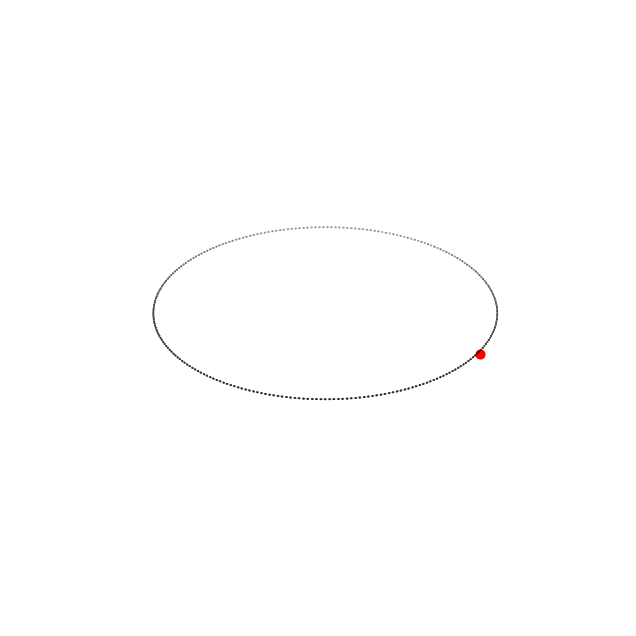

In [7]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')  
ax.set_ylabel('Y')
ax.set_zlabel('Z')


def update(i):
    ax.clear()

    ax.scatter(r_Gs[:, 0], r_Gs[:, 1], r_Gs[:, 2],
                c='black', marker='o', s=.05)
    
    ax.scatter(r_Gs[i, 0] + r_Ps[i, 0],
                r_Gs[i, 1] + r_Ps[i, 1],
                  r_Gs[i, 2] + r_Ps[i, 2],
                    c='red', marker='o', s=40)
    
    ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), zlim=(-1.5, 1.5))
    plt.axis('equal')
    plt.axis('off')
    
    
ani = FuncAnimation(fig, update,
                     frames=range(0, len(r_Gs)),
                       interval=120)

ani.save('venus_orbit.gif', fps=60)